# Example Conversion of PHY data to NWB data for analysis
This notebook give example code for converting PHY files from Spying Circus spike sorting into files for analysis.  The NWB formatted output files are in a simple TSV files to be used by for analysis in med64 projects. This will be a replacement of the earlier .MAT output files.  

__Format:__
- units_ts.tsv files will contain two columns. First column is spike time in seconds. Second column is the cluster number.
- Note that there may be many more spikes in the PHY datafile. The units_ts.tsv file will only keep spikes from clusters that have been deemed 'good'.
- unit_electrode.tsv files correlate the cluster ID with the recording electrode ID. First column is the cluster number. Second column is recording electrode with the highest amplitude for that spike.


## Read PHY data

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from meappy.meappy_data import *
import meappy.med64_data as me
from meappy.phy_2_nwb import *
from meappy.waveform import Fs

## Use PHY data in data directory on git to recreated the data
The code in the following cell finds the local path for data directories
on your computer. To use different input files or different output 
directories, substitute your computers local path to those.   

For example, replace:   
`phy_dir = get_example_data_path('20211109_15h09m07s/modat.GUI')`   
with    
`phy_dir = <your local path>`

In [2]:
# example data file path
phy_dir = get_example_data_path('20211109_15h09m07s/modat.GUI')

# temp data output files
temp_dir = get_test_data_path()
clust_chan_filepath = os.path.join(temp_dir, 'unit_electrode.tsv')
spiketime_clust_filepath = os.path.join(temp_dir, 'units_ts.tsv')

print(f'Read PHY data path \n\t{phy_dir}')
print(f'Write unit_chan data path \n\t{clust_chan_filepath}')
print(f'Write spike_ts_unit data path \n\t{spiketime_clust_filepath}')

Read PHY data path 
	/Users/walter/Src/meap/meappy/meappy/data/20211109_15h09m07s/modat.GUI
Write unit_chan data path 
	/Users/walter/Src/meap/meappy/meappy/temp_test_data/unit_electrode.tsv
Write spike_ts_unit data path 
	/Users/walter/Src/meap/meappy/meappy/temp_test_data/units_ts.tsv


## Read in the PHY directory files and 
## Write out the TSV files

In [3]:
# read and extract PHY data
spiketime_clust, clust_chan = extract_phy_data(phy_dir)

# write array from PHY to NWB files
write_int_array_to_tsv(clust_chan_filepath, clust_chan)
write_float_int_array_to_tsv(spiketime_clust_filepath, spiketime_clust)


Data written to /Users/walter/Src/meap/meappy/meappy/temp_test_data/unit_electrode.tsv
Data written to /Users/walter/Src/meap/meappy/meappy/temp_test_data/units_ts.tsv


# Check data in new TSV files
## Load array from newly written TSV files and display data

In [4]:
# load new converted PHY to NWB temp data output
clust_chan_new = load_int_arr(clust_chan_filepath)
spiketimes_new, clust_ids_new = load_spiketime_clust_arr(spiketime_clust_filepath)

print(f'Loaded unit_chan file: \n\t{clust_chan_filepath}')
print(f'Unit - Channel \n{clust_chan_new[:4]}')
print(f'Loaded spike_ts_unit file: \n\t{spiketime_clust_filepath}')

print(f'Number of spike times in file: \n\t{spiketimes_new.shape}')
print(f'Spike time range (seconds):\n\tMin\tMax\n\t{spiketimes_new[0]}\t{spiketimes_new[-1]}')
units, counts = np.unique(clust_ids_new, return_counts=True)
# temp = {x:clust_ids_new.count(x) for x in ts_units}
print(f'Unit - Counts \n{np.array([list(a) for a in zip(units, counts)])}')

Loaded unit_chan file: 
	/Users/walter/Src/meap/meappy/meappy/temp_test_data/unit_electrode.tsv
Unit - Channel 
[[13  5]
 [16 29]
 [32 15]
 [34 20]]
Loaded spike_ts_unit file: 
	/Users/walter/Src/meap/meappy/meappy/temp_test_data/units_ts.tsv
Number of spike times in file: 
	(29668,)
Spike time range (seconds):
	Min	Max
	0.7755	3789.9382
Unit - Counts 
[[   13 14775]
 [   16   194]
 [   32  1074]
 [   34 13625]]


## Display the firing rate over time
Each histogram is firing rate over session time for a unit

In [5]:
treatments_filepath = get_example_data_path('20211109_15h09m07s/treatments.csv')

print(f'Read PHY data path \n\t{treatments_filepath}')
tx_times = read_tx_file(treatments_filepath)

Read PHY data path 
	/Users/walter/Src/meap/meappy/meappy/data/20211109_15h09m07s/treatments.csv


[13, 16, 32, 34]


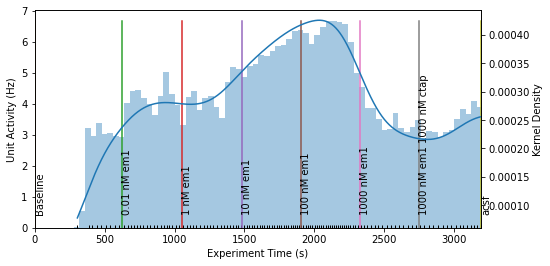

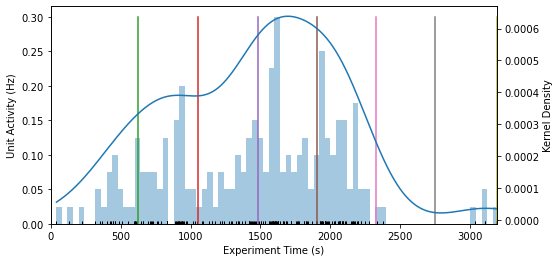

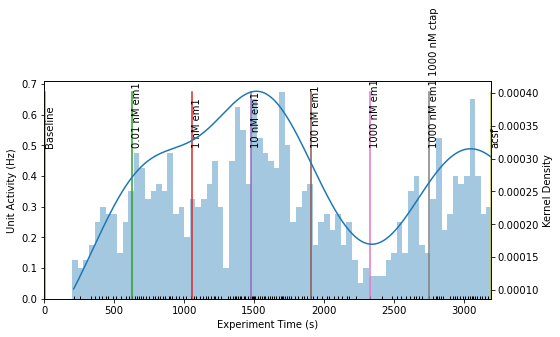

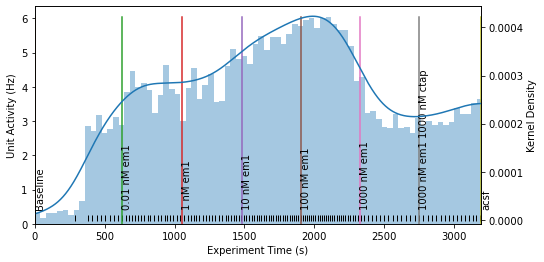

In [6]:
bin_sec = 40
clusts = [clust for clust, chan in clust_chan_new]
print(clusts)

for i in clusts:
    clust_index = np.where(clust_ids_new == i)
    spike_times = spiketimes_new[clust_index]
    
    # tx_times = {'zero': 0, 'one':1000, 'three':3000, 'max':max(spike_times)}
    me.plot_expt_histo(spike_times, tx_times, bin_sec)

## Command Line Example
Code in this notebook can also be implimented on the command line.

```zsh
python meap/meappy/meappy/phy_2_nwb.py /Users/walter/Desktop/EM1_VTA_PHY_for_conversion/20211109_15h09m07s.modat.GUI
```

## Optionally remove test data at end of session

In [7]:
cleanup_test_data()

Removing temporary directory: /Users/walter/Src/meap/meappy/meappy/temp_test_data
